# Feuille de route

<h2>Approche de travail</h2>
<ol>
<lio>
Chacun essaie de faire son propre preprpocessing
</lio>
<lio>
On choisit des algorithmes à essayer
<ul>
<li>
Random Forest
</li>
<li>
Decision tree
</li>
<li>
Logistic Regressor
</li>
<li>
K-NN
</li>
<li>
XGBoost
</li>
<li>
CatBoost
</li>
<li>
SVM (?)
</li>
</ul>
</lio>
<lio>
Assess results (tirer des conclusions)
</lio>
<lio>
</lio>
</ol>


# Using oversampling techniques


<h2>SMOTE</h2>


In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("heart_2022_no_nans.csv")
df2 = df.copy()

In [58]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [59]:
df.shape

(246022, 40)

<Axes: xlabel='HadHeartAttack'>

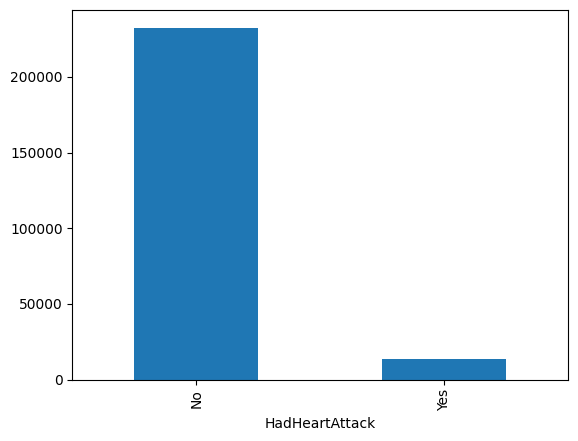

In [60]:
df["HadHeartAttack"].value_counts().plot(kind="bar")

In [61]:
ratio = df["HadHeartAttack"].value_counts()[0] / df["HadHeartAttack"].value_counts()[1]
ratio

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9796\2047389377.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio = df["HadHeartAttack"].value_counts()[0] / df["HadHeartAttack"].value_counts()[1]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9796\2047389377.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio = df["HadHeartAttack"].value_counts()[0] / df["HadHeartAttack"].value_counts()[1]


17.312020841086714

As we can see, we notice a big imbalance in the target value with a ratio of 17:1

That means that our dataset suffers from a huge imbalance in data.


<h2>Analyzing the rest of data</h2>


In [62]:
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

As we can see, our data contains a lot of categorical and non-numerical data.

We explore them further.


In [63]:
def get_unique_values(data):
    for column in data.columns:
        if data[column].dtype == object:
            print(f"{column} unique values: {data[column].unique()}")


get_unique_values(df)

State unique values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Sex unique values: ['Female' 'Male']
GeneralHealth unique values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
LastCheckupTime unique values: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago

As we can see, many of columns containt Yes or No columns, in which we will encode No with 0 and Yes with 1


In [64]:
yes_no_encoding = {"No": 0, "Yes": 1}

In [65]:
def encode_yes_no(data):
    data = data.replace(yes_no_encoding)
    return data


for column in df.columns.drop("HadHeartAttack"):
    if df[column].dtype == object:
        # if the column equals both "No" and "Yes"
        if (
            "No" in df[column].unique()
            and "Yes" in df[column].unique()
            and len(df[column].unique()) == 2
        ):
            df[column] = encode_yes_no(df[column])

In [66]:
for column in df.columns.drop("HadHeartAttack"):
    if df[column].dtype == object:
        print(f"{column} unique values: {df[column].unique()}")

State unique values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Sex unique values: ['Female' 'Male']
GeneralHealth unique values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
LastCheckupTime unique values: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago

Now for the ordinal and categorical columns.

Each column needs a custom encoding map, which we will do next


In [67]:
STATE = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "District of Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    42: "Pennsylvania",
    44: "Rhode Island",
    45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming",
    66: "Guam",
    72: "Puerto Rico",
    78: "Virgin Islands",
}


def reverse_key_value(dictionary):
    return {value: key for key, value in dictionary.items()}


STATE = reverse_key_value(STATE)

df["State"] = df["State"].map(STATE)

In [68]:
df["GeneralHealth"] = df["GeneralHealth"].map(
    {"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5}
)


df["LastCheckupTime"] = df["LastCheckupTime"].map(
    {
        "Within past year (anytime less than 12 months ago)": 1,
        "Within past 2 years (1 year but less than 2 years ago)": 2,
        "Within past 5 years (2 years but less than 5 years ago)": 3,
        "5 or more years ago": 4,
        "Never": 5,
    }
)


df["RemovedTeeth"] = df["RemovedTeeth"].map(
    {"None of them": 0, "1 to 5": 1, "6 or more, but not all": 3, "All": 4}
)


df["HadDiabetes"] = df["HadDiabetes"].map(
    {
        "No": 0,
        "Yes": 1,
        "Yes, but only during pregnancy (female)": 2,
        "No, pre-diabetes or borderline diabetes": 3,
    }
)


df["SmokerStatus"] = df["SmokerStatus"].map(
    {
        "Former smoker": 0,
        "Never smoked": 1,
        "Current smoker - now smokes some days": 2,
        "Current smoker - now smokes every day": 3,
    }
)


df["ECigaretteUsage"] = df["ECigaretteUsage"].map(
    {
        "Never used e-cigarettes in my entire life": 0,
        "Not at all (right now)": 1,
        "Use them some days": 2,
        "Use them every day": 3,
    }
)


df["RaceEthnicityCategory"] = df["RaceEthnicityCategory"].map(
    {
        "White only, Non-Hispanic": 0,
        "Black only, Non-Hispanic": 1,
        "Other race only, Non-Hispanic": 2,
        "Multiracial, Non-Hispanic": 3,
        "Hispanic": 4,
    }
)


df["AgeCategory"] = df["AgeCategory"].map(
    {
        "Age 18 to 24": 0,
        "Age 25 to 29": 1,
        "Age 30 to 34": 2,
        "Age 35 to 39": 3,
        "Age 40 to 44": 4,
        "Age 45 to 49": 5,
        "Age 50 to 54": 6,
        "Age 55 to 59": 7,
        "Age 60 to 64": 8,
        "Age 65 to 69": 9,
        "Age 70 to 74": 10,
        "Age 75 to 79": 11,
        "Age 80 or older": 12,
    }
)


df["TetanusLast10Tdap"] = df["TetanusLast10Tdap"].map(
    {
        "Yes, received Tdap": 0,
        "Yes, received tetanus shot but not sure what type": 1,
        "Yes, received tetanus shot, but not Tdap": 2,
        "No, did not receive any tetanus shot in the past 10 years": 3,
    }
)


df["CovidPos"] = df["CovidPos"].map(
    {
        "No": 0,
        "Yes": 1,
        "Tested positive using home test without a health professional": 2,
    }
)


df["Sex"] = df["Sex"].map({"Female": 1, "Male": 0})

We encoded the full dataset.

Let's visualize it now.


In [69]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,1,2,4.0,0.0,1,1,9.0,0,No,...,1.60,71.67,27.99,0,0,1,1,0,0,0
1,1,0,2,0.0,0.0,1,1,6.0,0,No,...,1.78,95.25,30.13,0,0,1,1,1,0,0
2,1,0,2,0.0,0.0,1,0,8.0,3,No,...,1.85,108.86,31.66,1,0,0,1,3,0,1
3,1,1,4,5.0,0.0,1,1,9.0,0,No,...,1.70,90.72,31.32,0,0,1,1,3,0,1
4,1,1,3,3.0,15.0,1,1,5.0,1,No,...,1.55,79.38,33.07,0,0,1,1,3,0,0


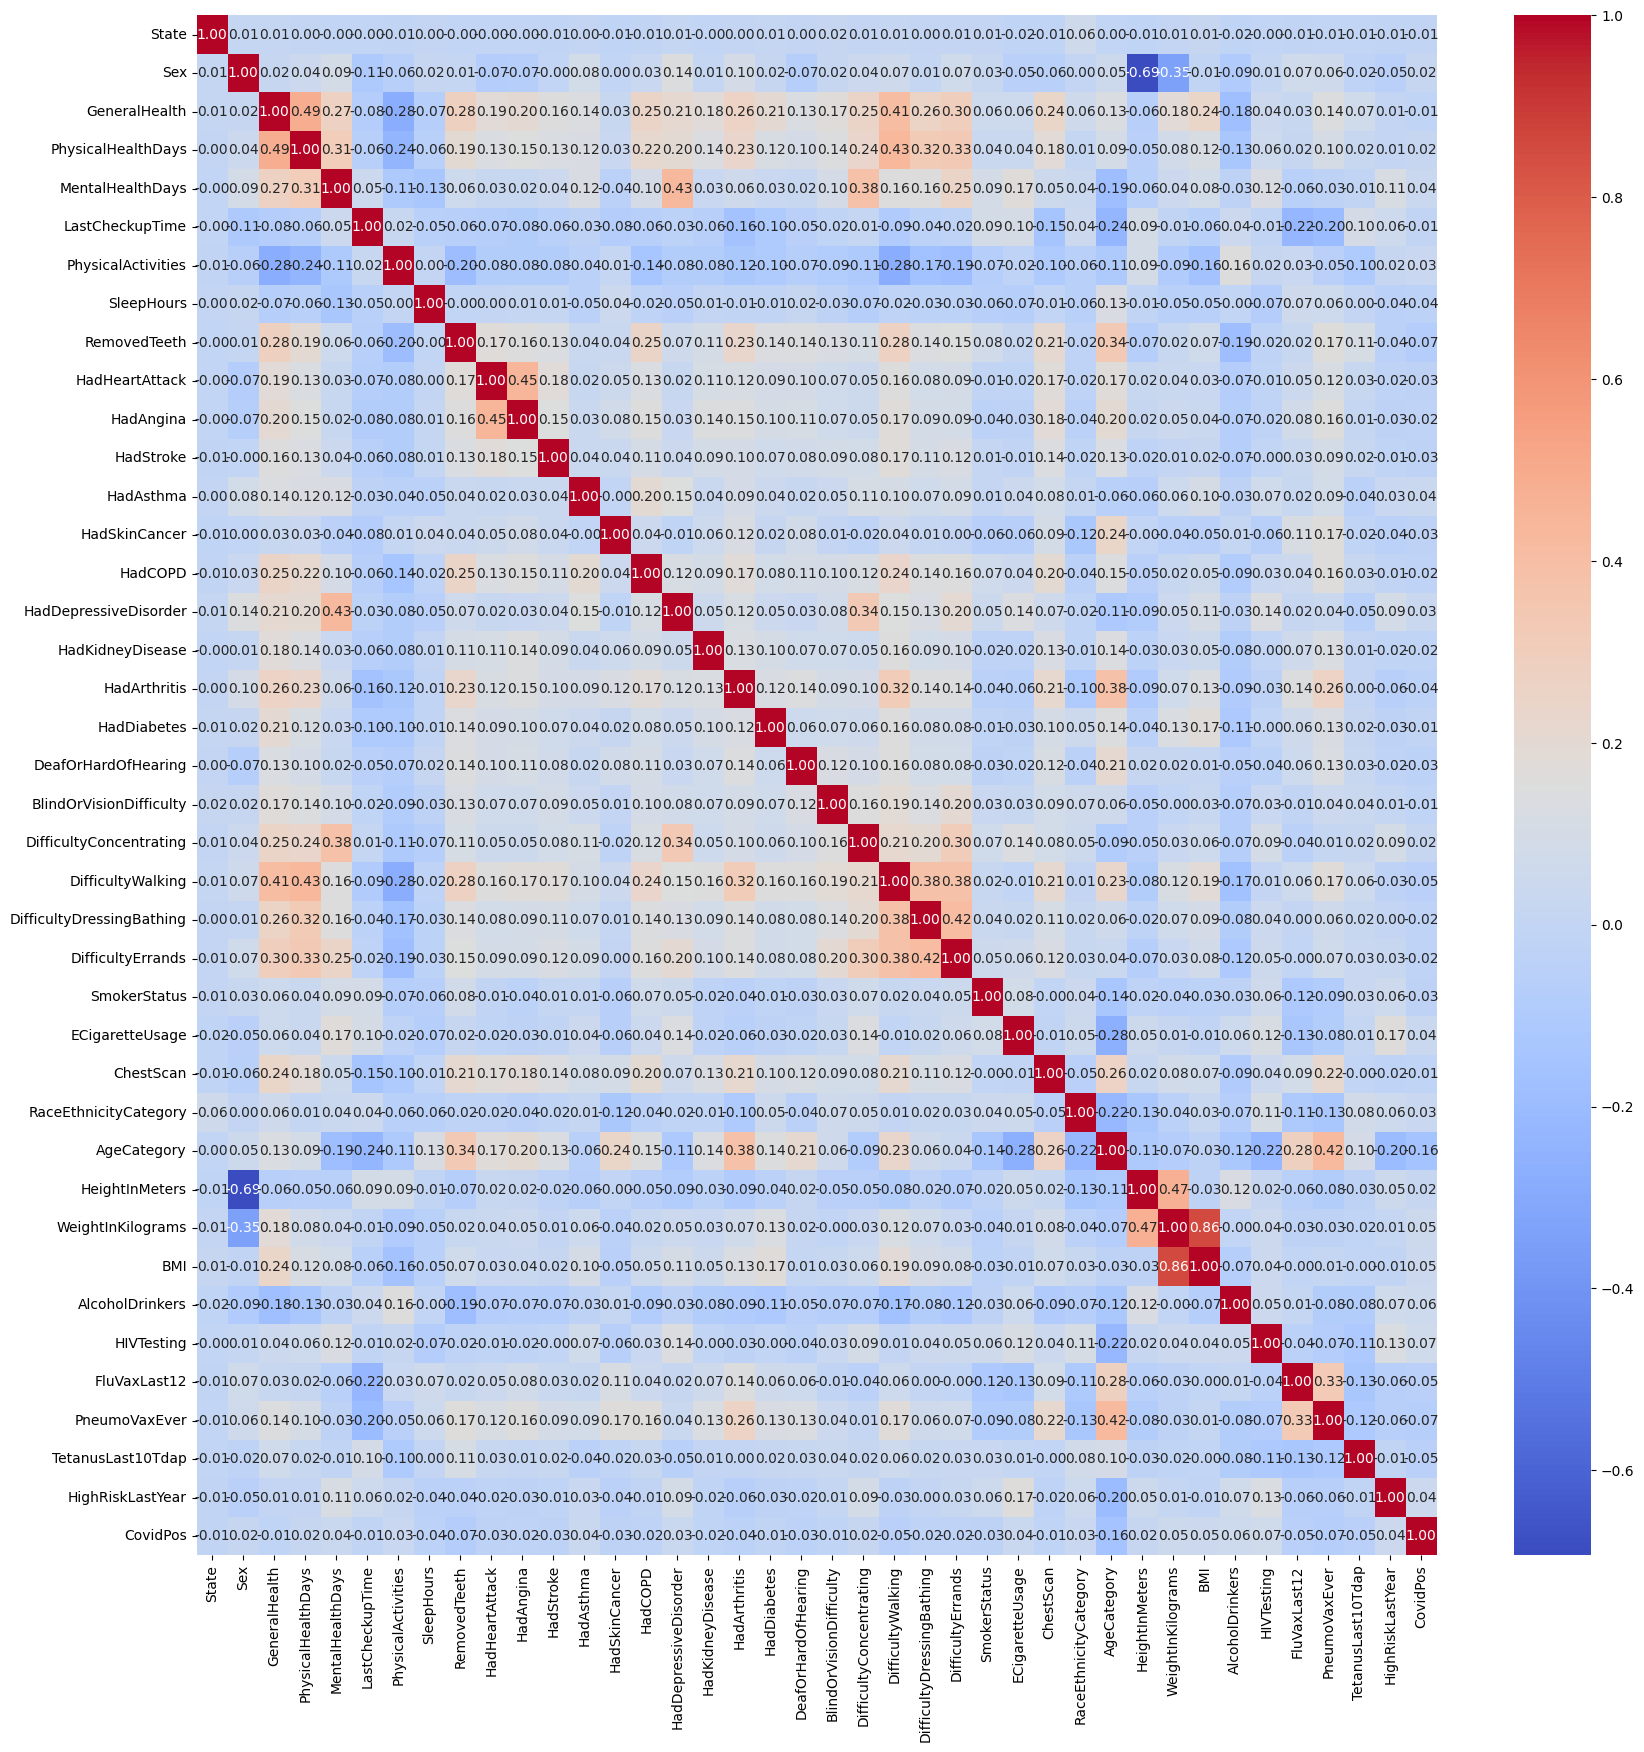

In [71]:
# Encode categorical columns
encoded_df = df.copy()
for column in encoded_df.columns:
    if encoded_df[column].dtype == object:
        encoded_df[column] = encoded_df[column].astype("category").cat.codes

# Generate correlation matrix heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(encoded_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
df["HadHeartAttack"] = df["HadHeartAttack"].map(yes_no_encoding)

In [ ]:
# show all columns with a correlation between them of over 0.3
corr_matrix = df.corr()
corr_matrix = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)
)
corr_matrix = corr_matrix.stack()
corr_matrix = corr_matrix[abs(corr_matrix) > 0.3]
corr_matrix = corr_matrix.reset_index()
corr_matrix.columns = ["Feature 1", "Feature 2", "Correlation"]
corr_matrix.sort_values(by="Correlation", ascending=False)

,Feature 1,Feature 2,Correlation
21,WeightInKilograms,BMI,0.859313
2,GeneralHealth,PhysicalHealthDays,0.489091
20,HeightInMeters,WeightInKilograms,0.473768
11,HadHeartAttack,HadAngina,0.445903
5,PhysicalHealthDays,DifficultyWalking,0.431514
8,MentalHealthDays,HadDepressiveDisorder,0.425058
19,AgeCategory,PneumoVaxEver,0.424318
18,DifficultyDressingBathing,DifficultyErrands,0.415714
3,GeneralHealth,DifficultyWalking,0.409204
16,DifficultyWalking,DifficultyDressingBathing,0.383797


By interpreting our results, we can conclude a lot of things.

(ignoring the obvious/irrelevant correlations like weight and BMI, Height and Weight and similar)

<ol>
<li>
Strong correlation between Depressive Disorder and Mental health
</li>
<li>
Difficulties in walking and hygiene maintenance often means difficulty running errands and walking or having any type of physical activity, which means that individuals suffering from these difficulties have lower general health, which may suggest that they can also have heart problems.
</li>
<li>
Depression could lead to concentration difficulties and running errands difficulties. Which is often observed by scientists.
</li>
<li>
People who don't take a certain vaccine are often more susceptible to taking other vaccines.
</li>
<li>
With age comes Arthrithis which could mean lower general health, seen by the difficulty to walk and run errands, dressing and bathing difficulties, which are directly correlated with general health.
</li>
<li>
Older people are more susceptible to not taking Pneumo Vaccines, which could mean not taking other vaccines.
</li>
<li>
Sex is slightly significant in having diabetes.
</li>
</ol>
<p>
These conclusions could be used if we decide to use PCA further down the line.<br>
But they're more significant to adding new information for the reader
</p>


In [ ]:
correlation = df.corr()
correlation_had_heart_attack = correlation[["HadHeartAttack"]]

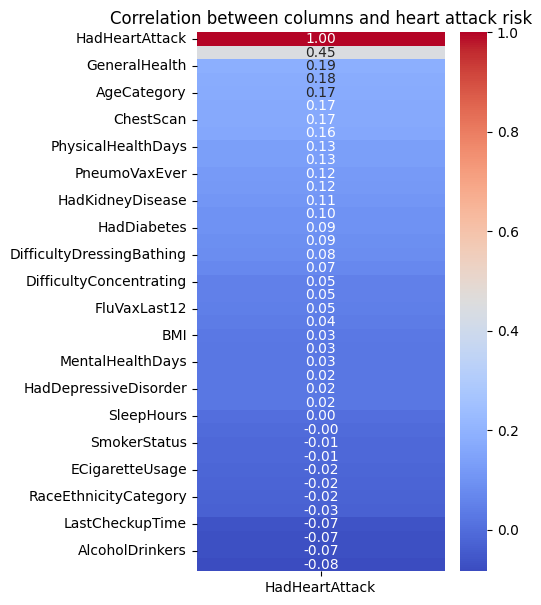

In [ ]:
plt.figure(figsize=(4, 7))
sns.heatmap(
    correlation_had_heart_attack.sort_values(by="HadHeartAttack", ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Correlation between columns and heart attack risk")
plt.show()

As we can see on the correlation heatmap with the target column, having Angina is a very major factor in the risk of having a heart attack.

**Angina**: Angina (an-JIE-nuh or AN-juh-nuh) is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease.

Angina also is called angina pectoris.


<Axes: xlabel='HadAngina'>

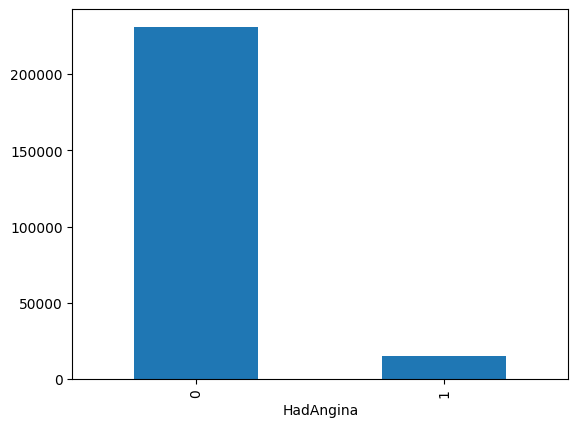

In [ ]:
df["HadAngina"].value_counts().plot(kind="bar")

It seems like the majority of people surveyed in this study don't suffer from Angina, we will discover how important it is to heart attacks in our prediction.


<h3>
Testing few models for prediction to be used a benchmark.
</h3>


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def get_classification_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print accuracy in predicting the 0 class
    print(f"Accuracy : {model.score(X_test, y_test)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
X = df.drop("HadHeartAttack", axis=1)
y = df["HadHeartAttack"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Accuracy : 0.9487582478626688
[[69365   444]
 [ 3338   660]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     69809
           1       0.60      0.17      0.26      3998

    accuracy                           0.95     73807
   macro avg       0.78      0.58      0.62     73807
weighted avg       0.93      0.95      0.93     73807



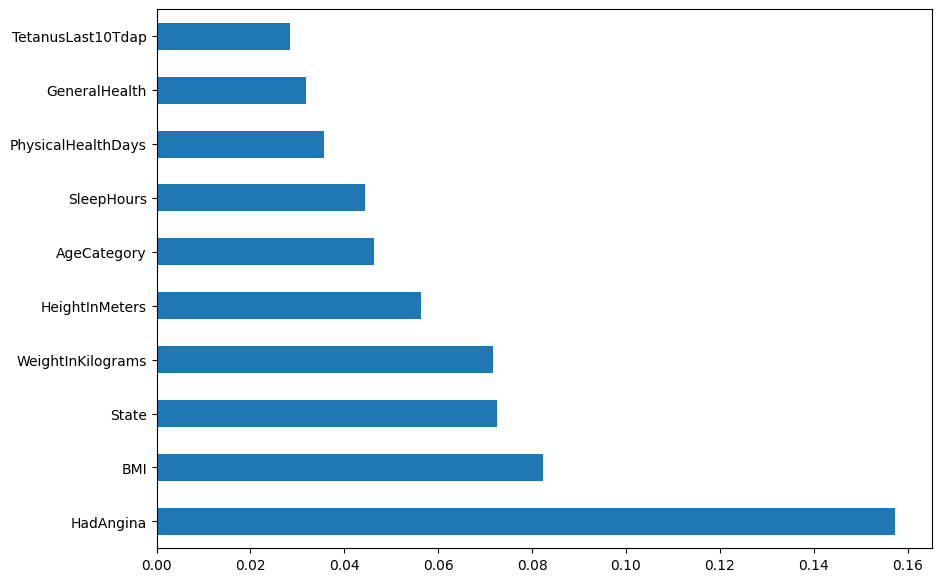

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
get_classification_report(rf, X_train, X_test, y_train, y_test)

plt.figure(figsize=(10, 7))
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(
    ascending=False
)
importances.nlargest(10).plot(kind="barh")
plt.show()

Accuracy : 0.915875187990299
[[66401  3408]
 [ 2801  1197]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     69809
           1       0.26      0.30      0.28      3998

    accuracy                           0.92     73807
   macro avg       0.61      0.63      0.62     73807
weighted avg       0.92      0.92      0.92     73807



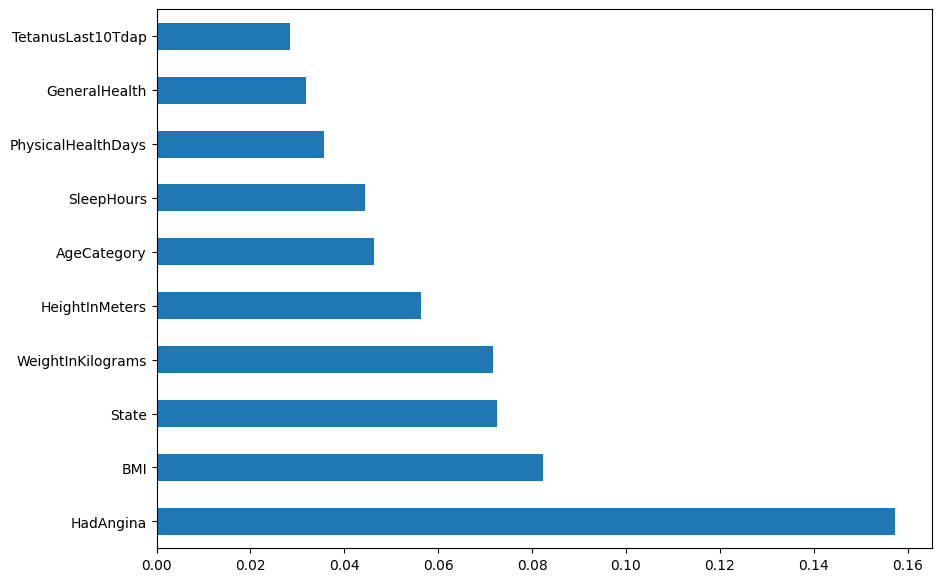

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
get_classification_report(dt, X_train, X_test, y_train, y_test)
plt.figure(figsize=(10, 7))
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(
    ascending=False
)
importances.nlargest(10).plot(kind="barh")
plt.show()

Accuracy : 0.9486363082092485
[[69143   666]
 [ 3125   873]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     69809
           1       0.57      0.22      0.32      3998

    accuracy                           0.95     73807
   macro avg       0.76      0.60      0.64     73807
weighted avg       0.94      0.95      0.94     73807



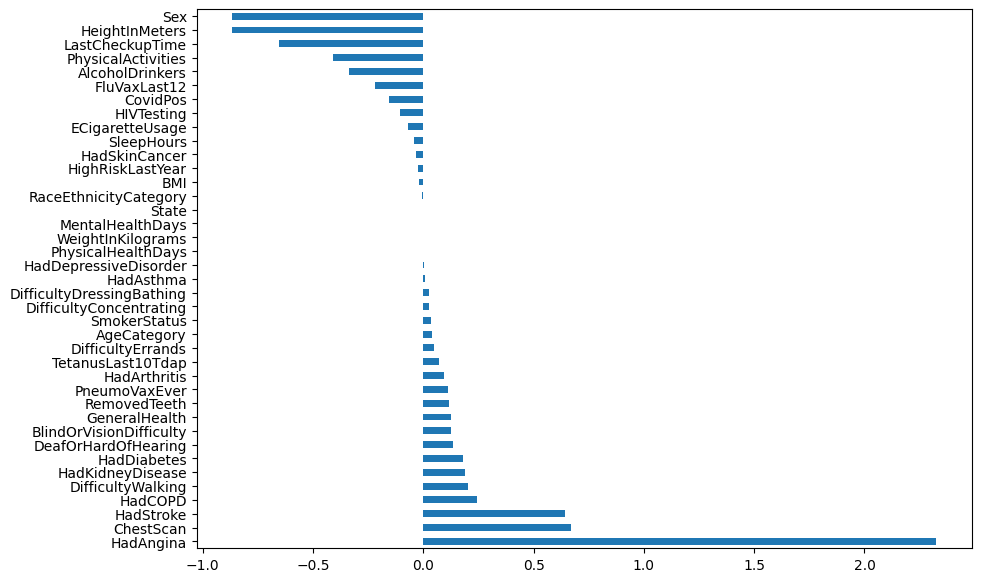

In [ ]:
lr = LogisticRegression(n_jobs=-1, random_state=42)
get_classification_report(lr, X_train, X_test, y_train, y_test)
# plot coefficients for logistic regression
plt.figure(figsize=(10, 7))
coefficients = pd.Series(lr.coef_[0], index=X.columns).sort_values(ascending=False)
coefficients.plot(kind="barh")
plt.show()

<h4>
Conclusions
</h4>
<p>
With the three models tried, without any resampling or balancing techniques, we can notice how the hypothesis about the Angina column being the most important feature, which translated perfectly to the prediction of our models.
</p>


<h4>
Model evaluation
</h4>
<p>
As we can see in the test scores of our models, we have heavily biased models that skew towards the biased class and the most prominent (No heart attack).<br>
Although they are highly accurate (+90% for each model), they do struggle to detect the lower density class.
</p>


# Applying sampling techniques.


In order to account for the imbalance in our data, we could use different sampling techniques that will let us correct and negate the effect of data imbalance and ccreate more precise and better AI models, which won't fail as miserably to detect the risk of heart disease.


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
get_classification_report(rf, X_train, X_test, y_train, y_test)

dt = DecisionTreeClassifier(random_state=42)
get_classification_report(dt, X_train, X_test, y_train, y_test)

lr = LogisticRegression(n_jobs=-1, random_state=42)
get_classification_report(lr, X_train, X_test, y_train, y_test)

Accuracy : 0.9553502970197703
[[66516  3390]
 [ 2841 66806]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     69906
           1       0.95      0.96      0.96     69647

    accuracy                           0.96    139553
   macro avg       0.96      0.96      0.96    139553
weighted avg       0.96      0.96      0.96    139553

Accuracy : 0.9182174514342222
[[63045  6861]
 [ 4552 65095]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     69906
           1       0.90      0.93      0.92     69647

    accuracy                           0.92    139553
   macro avg       0.92      0.92      0.92    139553
weighted avg       0.92      0.92      0.92    139553

Accuracy : 0.8455210565161623
[[58955 10951]
 [10607 59040]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     69906
           1       0.84      0.85      0.85     69647


In [ ]:
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_under, y_under, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
get_classification_report(rf, X_train, X_test, y_train, y_test)

dt = DecisionTreeClassifier(random_state=42)
get_classification_report(dt, X_train, X_test, y_train, y_test)

lr = LogisticRegression(n_jobs=-1, random_state=42)
get_classification_report(lr, X_train, X_test, y_train, y_test)

Accuracy : 0.7989083240292768
[[3241  777]
 [ 844 3199]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4018
           1       0.80      0.79      0.80      4043

    accuracy                           0.80      8061
   macro avg       0.80      0.80      0.80      8061
weighted avg       0.80      0.80      0.80      8061

Accuracy : 0.7151718149113013
[[2919 1099]
 [1197 2846]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4018
           1       0.72      0.70      0.71      4043

    accuracy                           0.72      8061
   macro avg       0.72      0.72      0.72      8061
weighted avg       0.72      0.72      0.72      8061

Accuracy : 0.7979158913286193
[[3291  727]
 [ 902 3141]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4018
           1       0.81      0.78      0.79      4043

    accurac

In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_over, y_over, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
get_classification_report(rf, X_train, X_test, y_train, y_test)

dt = DecisionTreeClassifier(random_state=42)
get_classification_report(dt, X_train, X_test, y_train, y_test)

lr = LogisticRegression(n_jobs=-1, random_state=42)
get_classification_report(lr, X_train, X_test, y_train, y_test)

Accuracy : 0.9885204904229934
[[68304  1602]
 [    0 69647]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     69906
           1       0.98      1.00      0.99     69647

    accuracy                           0.99    139553
   macro avg       0.99      0.99      0.99    139553
weighted avg       0.99      0.99      0.99    139553

Accuracy : 0.9724835725494974
[[66066  3840]
 [    0 69647]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     69906
           1       0.95      1.00      0.97     69647

    accuracy                           0.97    139553
   macro avg       0.97      0.97      0.97    139553
weighted avg       0.97      0.97      0.97    139553

Accuracy : 0.8004199121480727
[[57554 12352]
 [15500 54147]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81     69906
           1       0.81      0.78      0.80     69647
